# Imports

In [156]:
#imports 
#this cell will cause errors if every module is not installed on the environment on which one is trying to run the code.
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron





# Data Input and Preprocessing

In [157]:
#read in data and preprocess it
df = pd.read_csv("Cancer_Data.csv")
df = df.drop('id',axis = 1)

#remove column of NaN that was tacked onto the end for some reason
df=df.dropna(axis=1,how='all')

#encodes data into numerical values
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

#x and y data
y = df['diagnosis']
X = df.drop('diagnosis', axis = 1)

#scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Perceptron Model

Create and fit perceptron model

In [158]:
#create the model
per_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
#fit the model
per_model.fit(X_train, y_train)


Perceptron(random_state=42)

make predictions

In [159]:

#make predictions
y_pred_perceptrons = per_model.predict(X_test)

# Sequential Deep Neural Network

Build, train, and compile model

In [160]:

#build model
dnn_model = keras.Sequential([
    
    #input layer layer
    layers.Dense(96, activation='relu'),

    #first hidden layer
    layers.Dense(96, activation = 'sigmoid'),
    
    #second hidden layer
    layers.Dense(96, activation = 'sigmoid'),

    #output layer
    layers.Dense(1, activation = 'sigmoid'),


  ])



#compile model
dnn_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001))

#train model
dnn_model.fit(X_train,y_train, epochs = 100, verbose = 0)


Make predictions

In [161]:
#predict values of test data. this will generate a decimal value between 0 and one
#most are very very close to 0 or one, but not all of them
y_pred_dnn = dnn_model.predict(X_test)
#because this is a binary classification problem, we use this function to round values to 0 or 1
y_pred_dnn_binary = [round(prediction[0]) for prediction in y_pred_dnn]


4/4 [==============================] - 0s 2ms/step


# Evaluate Models 

In [162]:
#more imports. once again, error will be thrown if all modules are not installed
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

#method for getting some information about model performance
def get_scores(y_test,y_pred):
    scores = {}
    scores['Accuracy'] = accuracy_score(y_test,y_pred)#proportion of predictions that are correct
    scores['Recall'] = recall_score(y_test,y_pred)#proportion of true positives to positive predictions. true positive values/(correct positive predictions + false negative predictions)
    scores['Precision'] = precision_score(y_test,y_pred)#proportion of positive predictions that are correct. correct positive predictions / correct positive predictions + false positive predictions
    scores['F1'] = f1_score(y_test,y_pred)# harmonic mean of precision and recall scores
    
    return scores

#method for getting values of a confusion matrix. just another way to get information about model performance
def get_confusion(y_test, y_pred):
    confusion_vals = {}

    confusion_mat = confusion_matrix(y_test,y_pred)

    confusion_vals['True Positive'] = confusion_mat[0][0]
    confusion_vals['False Positive'] = confusion_mat[0][1]
    confusion_vals['False Negative'] = confusion_mat[1][0]
    confusion_vals['True Negative'] = confusion_mat[1][1]

    return confusion_vals




# Comparisons of Models with Graphs

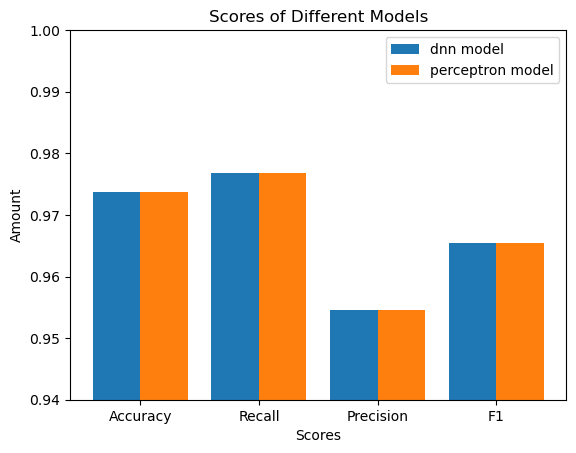

In [163]:
X = ['Accuracy', 'Recall', 'Precision', 'F1']
results_dnn = get_scores(y_test,y_pred_dnn_binary)
results_perceptron = get_scores(y_test,y_pred_perceptrons)
Ydnn = results_dnn.values()
Zperceptron = results_perceptron.values()
plt.ylim(0.94,1.0)
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Ydnn, 0.4, label = 'dnn model')
plt.bar(X_axis + 0.2, Zperceptron, 0.4, label = 'perceptron model')
plt.xticks(X_axis, X)
plt.xlabel('Scores')
plt.ylabel('Amount')
plt.title('Scores of Different Models')
plt.legend()
plt.show()



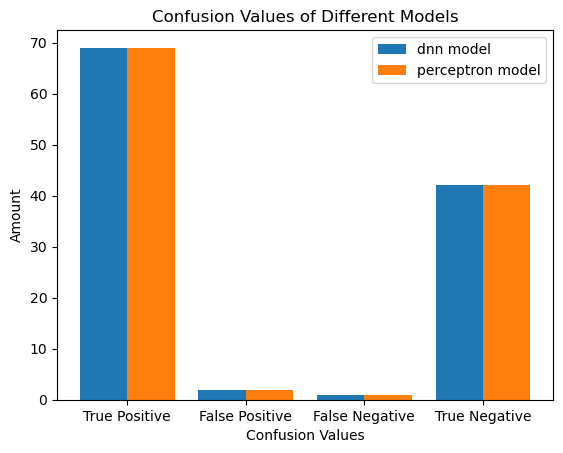

In [164]:
X = ['True Positive', 'False Positive', 'False Negative', 'True Negative']
results_dnn = get_confusion(y_test,y_pred_dnn_binary)
results_perceptron = get_confusion(y_test,y_pred_perceptrons)
Ydnn = results_dnn.values()
Zperceptron = results_perceptron.values()
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Ydnn, 0.4, label = 'dnn model')
plt.bar(X_axis + 0.2, Zperceptron, 0.4, label = 'perceptron model')
plt.xticks(X_axis, X)
plt.xlabel('Confusion Values')
plt.ylabel('Amount')
plt.title('Confusion Values of Different Models')
plt.legend()
plt.show()

